In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import json
import pygraphviz as pgv
from natsort import natsorted
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
def draw_hierarchy(G, pos, **kwargs):
    A = nx.nx_agraph.to_agraph(G)
    A.layout(prog='dot')
    pos = graphviz_layout(G, prog='dot')
    nx.draw_networkx_nodes(G, pos, **kwargs)
    nx.draw_networkx_edges(G, pos, arrows=True)
    nx.draw_networkx_labels(G, pos)
    

### JSON 로드

- memories

In [3]:
# JSON 파일 로드
with open('/data/data2/khahn/comet_memory_dialog_former/data/combined_memories.json') as f:
    memories_1100 = json.load(f)
len(memories_1100)

1100

- memory_group

In [4]:
# JSON 파일 로드
with open('/data/data2/khahn/comet_memory_dialog_former/data/combined_memory_groups_1100.json') as f:
    memory_group_1100 = json.load(f)
len(memory_group_1100)

1100

### memories

In [5]:
# 그래프 생성 함수
# 그래프 생성 함수
def create_memories_graph(memory, index):
    
    ## 둘 중 하나 선택(optional)
    # G = nx.DiGraph() # Direct Graph
    G = nx.Graph() # Undirect Graph

    # 상위-하위 level 그래프
    def add_node_and_edge(node, memories_node, color):
        G.add_node(node, color=color)
        G.add_edge(memories_node, node)
        
    # 상위-중위-하위 level 그래프
    def add_sub_node_and_edge(sub_node, mid_node, top_node, color):
        G.add_node(sub_node, color=color)
        G.add_edge(mid_node, sub_node)
        G.add_edge(top_node, mid_node)

    # 'memory_groups'의 'memories' 각 리스트 성분노드에 연결해줄 중간 level 노드
    def add_memories_node(memories_node, color):
        G.add_node(memories_node, color=color)
        # G.add_edge(f'memories_node_{index+1}', memories_node)
        G.add_edge(memory['memory_id'], memories_node)

    # "memories_node" 노드 추가
    # G.add_node(f'memories_node_{index+1}', color="pink") # 1부터 시작 (1~92)
    G.add_node(memory['memory_id'], color="pink") # 1부터 시작 (1~92)

    # 각 상위 노드를 "memories"에 연결하고, 그 상위 노드에 따른 하위 노드들을 추가
    # for memories_node in ['memory_id', 'time', 'media', 'location', 'participant', 'activity', 'objects', 'time_part']:
    # for memories_node in ['narrations','time', 'media', 'location', 'participant', 'activity', 'objects', 'time_part']:
    #     if memories_node in memory and memory[memories_node]:  # 상위 노드에 해당하는 값이 있는 경우만 노드를 생성
    #         add_memories_node(memories_node, 'lightgray')
    
    ## 'narrations' 정보 노드 추가
    if 'narrations' in memory and memory['narrations']:
        # print(memory['narrations'])
        add_node_and_edge(memory['narrations'], memory['memory_id'], '#81F79F')
            
    ## 'time' 정보 노드 추가
    if 'time' in memory and memory['time']:
        # print(memory['time'])
        add_node_and_edge(memory['time'], memory['memory_id'], '#FA5882')

    # ## 'memory_id' 정보 노드 추가
    # if 'memory_id' in memory and memory['memory_id']:
    #     add_node_and_edge(memory['memory_id'], 'memory_id', '#81F7BE')
    
    ## 'media' 정보 노드 추가
    if 'media' in memory and memory['media']:
        #'media' 하위 정보들의 value값을 노드명으로 지정
        media_values = [str(value) for key, value in memory['media'][0].items() if value] 
        # print(media_values[0])
        # add_node_and_edge(media_values[0], 'media', 'blue')
        add_node_and_edge(media_values[3], memory['memory_id'], 'blue')
        # add_node_and_edge(media_values[0], 'media', 'blue')
        # for value in media_values:
        #     add_node_and_edge(value, 'media', 'blue')
        
    ## 'location' 정보 노드 추가
    if 'location' in memory:
        # # GPS 정보 
        # if 'gps' in memory['location'] and memory['location']['gps']:
        #     G.add_node('gps', color='orange') 
        #     gps_values = [str(value) for key, value in memory['location']['gps'].items() if value]
        #     for value in gps_values:
        #         add_sub_node_and_edge(value, 'gps', 'location', 'orange')

        # Geo tag 정보 
        if 'geo_tag' in memory['location'] and memory['location']['geo_tag']:
            # G.add_node('geo_tag', color='orange')  
            geo_tag_values = [str(value) for key, value in memory['location']['geo_tag'].items() if value]
            
            for value in geo_tag_values:
                add_node_and_edge(value, memory['memory_id'], 'orange')
                
            # print(geo_tag_values)
            # print("\n")
            # for value in geo_tag_values:
            #     add_sub_node_and_edge(value, 'geo_tag', memory['memory_id'], 'orange')

        # # Category 정보 
        # if 'category' in memory['location'] and memory['location']['category']:
        #     G.add_node('category', color='orange') 
        #     for category in memory['location']['category']:
        #         add_sub_node_and_edge(category, 'category', 'location', 'orange')

        # # Set 정보 
        # if 'set' in memory['location'] and memory['location']['set']:
        #     G.add_node('set', color='orange') 
        #     add_sub_node_and_edge(memory['location']['set'], 'set', 'location', 'orange')


    ## 'activity' 정보 노드 추가
    if 'activity' in memory and memory['activity']:
        activity_values = [activity['activity_name'] for activity in memory['activity']]
        for value in activity_values:
            add_node_and_edge(value, memory['memory_id'], 'green')


    ## 'objects' 정보 노드 추가
    if 'objects' in memory and memory['objects']:
        for value in memory['objects']:
            add_node_and_edge(value, memory['memory_id'], 'red')


    ## 'participant' 정보 노드 추가
    if 'participant' in memory:
        for participant in memory['participant']:
            if 'name' in participant and participant['name'] and 'memory_graph_id' in participant:
                add_node_and_edge(participant['name'], memory['memory_id'], 'skyblue')
    
    ## 'time_part' 정보 노드 추가
    if 'time_part' in memory:
        add_node_and_edge(memory['time_part'], memory['memory_id'], 'yellow')
            
    return G



In [6]:
memories_1100[0]

[{'memory_id': 1034219,
  'time': '2019-12-11 21:55:00',
  'start_time': None,
  'end_time': None,
  'narrations': 'A stove top topped with three pans filled with food.',
  'media': [{'media_id': 79506,
    'type': 'photo',
    'media_source': 'mscoco_train2014',
    'metadata': {},
    'file_name': 'memory_IfZ372LvXKa9_0.jpg',
    'url': 'https://simmc2.s3-us-west-1.amazonaws.com/memory_IfZ372LvXKa9_0.jpg'}],
  'location': {'gps': {'lat': -1, 'lon': -1},
   'geo_tag': {'location_id': 59,
    'place': 'Lawn',
    'city': 'Boston',
    'state': 'MA',
    'country': 'USA',
    'place_type': 'lawn'},
   'category': ['park', 'lawn', 'home'],
   'set': 'location_7_0'},
  'participant': [],
  'activity': [{'activity_name': 'cooking sausages'}],
  'objects': ['bowl', 'oven', 'fork', 'bottle', 'kitchen', 'appliance'],
  'verbs': None,
  'time_part': 'night'},
 {'memory_id': 1011362,
  'time': '2020-08-16 19:35:00',
  'start_time': None,
  'end_time': None,
  'narrations': 'The room has  a numb

In [7]:
for j, data in enumerate(memories_1100):
    # 각 그래프마다 새로운 폴더 생성 (예: 'graphs/graph_0', 'graphs/graph_1', ...)
    output_dir = os.path.join(f"/data/data2/khahn/comet_memory_dialog_former/combined_memories_graph_1100_update/memories_graph_{j+1}")
    os.makedirs(output_dir, exist_ok=True)
    
    for i, memory in enumerate(data):
        graph = create_memories_graph(memory, i)
        
        # 그래프를 해당 폴더에 파일로 저장 (예: 'graphs/graph_0/graph.gpickle', 'graphs/graph_1/graph.gpickle', ...)
        nx.write_gpickle(graph, f"/data/data2/khahn/comet_memory_dialog_former/combined_memories_graph_1100_update/memories_graph_{j+1}/memories_{i+1}.gpickle")

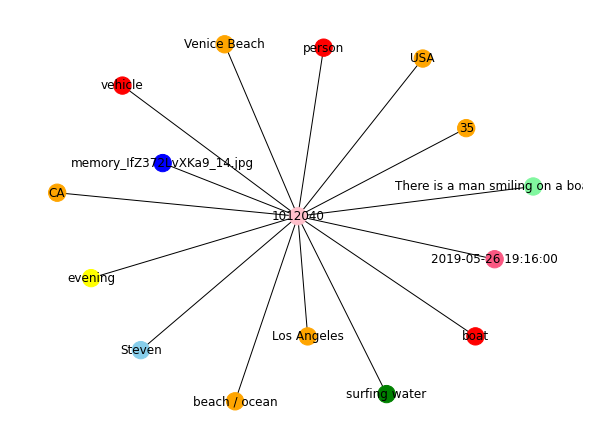

In [8]:
## 파일로 저장된 그래프 불러오기

import networkx as nx
import matplotlib.pyplot as plt

# G load
memories_each_graph = nx.read_gpickle("/data/data2/khahn/comet_memory_dialog_former/combined_memories_graph_1100_update/memories_graph_1/memories_15.gpickle") # 각자 폴더 경로 수정 필요!

# 각 노드의 색상 load
node_colors = [memories_each_graph.nodes[node]['color'] if 'color' in memories_each_graph.nodes[node] else 'lightgray' for node in memories_each_graph.nodes]

# 그래프 시각화
plt.figure(figsize=(8,6))
nx.draw(memories_each_graph, with_labels=True, node_color=node_colors)
plt.show()


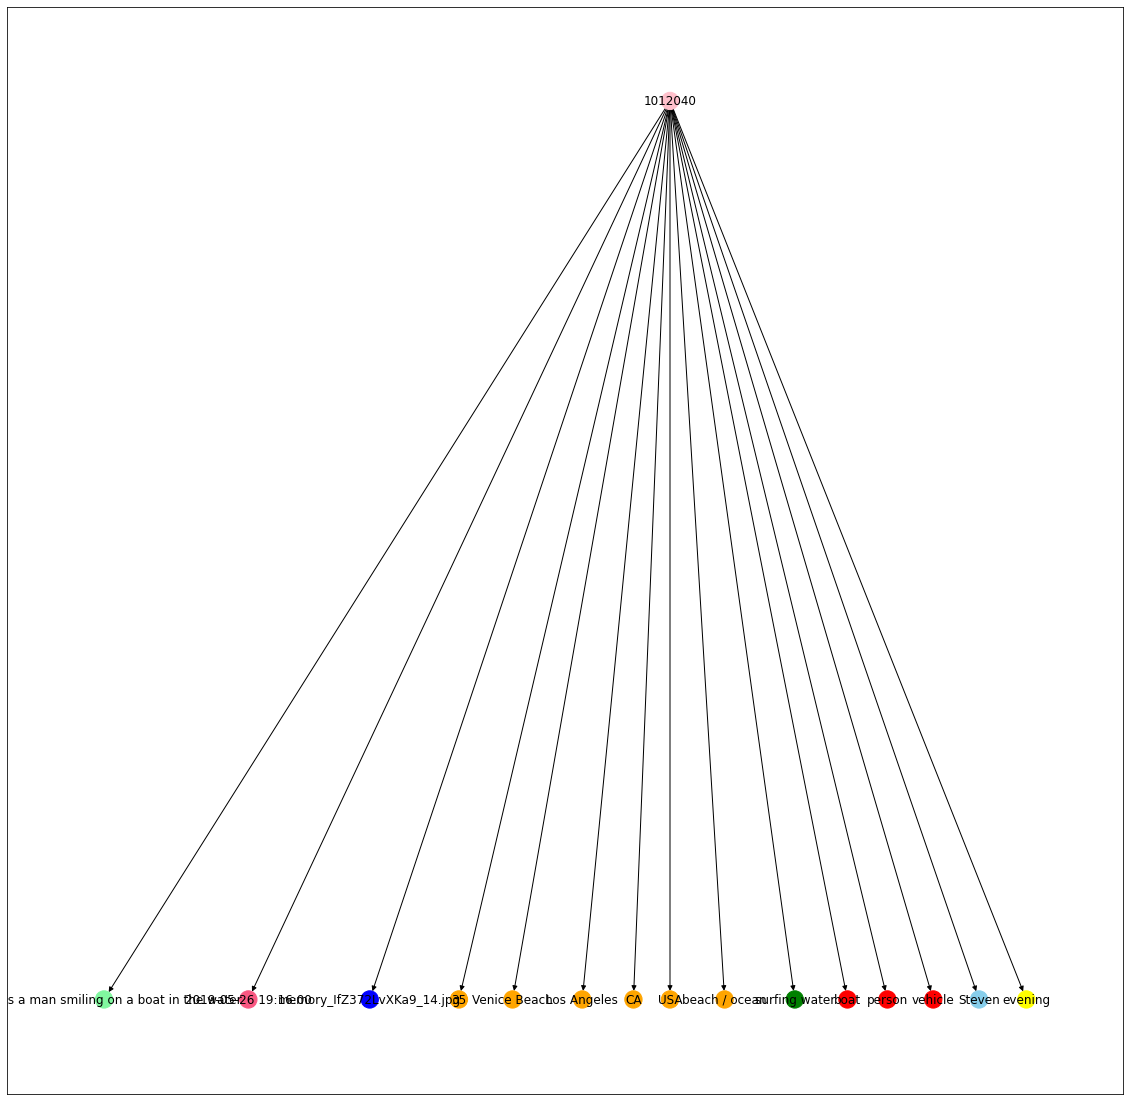

In [11]:
plt.figure(figsize=(20, 20))
memories_graph_sample = nx.read_gpickle("/data/data2/khahn/comet_memory_dialog_former/combined_memories_graph_1100_update/memories_graph_1/memories_15.gpickle")
node_colors = [memories_graph_sample.nodes[node]['color'] if 'color' in memories_graph_sample.nodes[node] else '#61380B' for node in memories_graph_sample.nodes]
draw_hierarchy(memories_graph_sample, None, node_color=node_colors)
    

### memory group 

In [12]:
## memory_group 그래프 생성
def create_memory_groups_graph(memory, index):
    G = nx.DiGraph() # 상위노드 -> 하위노드 (단방향그래프)
    
    # 상위-하위 level 그래프
    def add_node_and_edge(node, memories_node, color):
        G.add_node(node, color=color)
        G.add_edge(memories_node, node)
        
    trip_id = 'trip_' + str(memory['trip_id'])
    G.add_node(trip_id, color="#AC58FA")  # trip_id 노드 추가, level 0
    
    for day in memory['days']:
        day_id = 'day_' + str(day['day_id'])  
        add_node_and_edge(day_id, trip_id, "#886A08")
        
        for event in day['events']:
            event_id = 'event_' + str(event['event_id'])  
            add_node_and_edge(event_id, day_id, "#819FF7")
            
            for memory in event['memories']:
                add_node_and_edge(str(memory), event_id, "#BCF5A9")
                      
    return G

In [14]:
import os
import json

# 각 메모리에 대해 그래프 생성 및 저장

for j, data in enumerate(memory_group_1100):
    # 각 그래프마다 새로운 폴더 생성 (예: 'graphs/graph_0', 'graphs/graph_1', ...)
    output_dir = os.path.join(f"/data/data2/khahn/comet_memory_dialog_former/combined_memory_group_graph_1100/memory_group_graph_{j+1}")
    os.makedirs(output_dir, exist_ok=True)
    
    for i, memory in enumerate(data):
        graph = create_memory_groups_graph(memory, i)
        
        # 그래프를 해당 폴더에 파일로 저장 (예: 'graphs/graph_0/graph.gpickle', 'graphs/graph_1/graph.gpickle', ...)
        # nx.write_gpickle(graph, f"/data/data2/khahn/comet_memory_dialog_former/combined_memory_group_graph_1100/memory_group_graph_{j+1}/memory_group_{i}.gpickle")

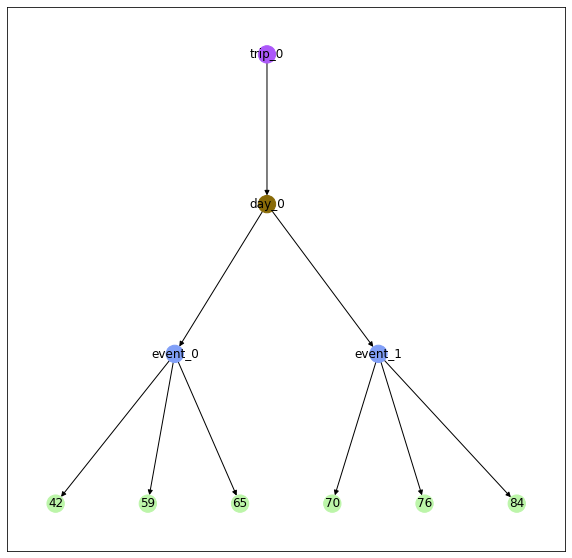

In [16]:
plt.figure(figsize=(10, 10))
memory_group_graph_sample = nx.read_gpickle("/data/data2/khahn/comet_memory_dialog_former/combined_memory_group_graph_1100/memory_group_graph_1/memory_group_0.gpickle")
node_colors = [memory_group_graph_sample.nodes[node]['color'] if 'color' in memory_group_graph_sample.nodes[node] else '#61380B' for node in memory_group_graph_sample.nodes]
draw_hierarchy(memory_group_graph_sample, None, node_color=node_colors)
    

### memory graph

In [17]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import json
import pygraphviz as pgv
from natsort import natsorted
from networkx.drawing.nx_agraph import graphviz_layout

def draw_hierarchy(G, pos, **kwargs):
    A = nx.nx_agraph.to_agraph(G)
    A.layout(prog='dot')
    pos = graphviz_layout(G, prog='dot')
    nx.draw_networkx_nodes(G, pos, **kwargs)
    nx.draw_networkx_edges(G, pos, arrows=True)
    nx.draw_networkx_labels(G, pos)
    
    

# 폴더 경로 설정
memories_path = '/data/data2/khahn/comet_memory_dialog_former/combined_memories_graph_1100_update'
memory_group_path = '/data/data2/khahn/comet_memory_dialog_former/combined_memory_group_graph_1100'

G = nx.DiGraph()

## 1100개 폴더 
for i in range(1, 1101):
    # print("i번째 폴더 갯수",i
    ############
    output_dir = os.path.join(f"/data/data2/khahn/comet_memory_dialog_former/combined_memory_graph_1100_update/memory_graph_{i}")
    os.makedirs(output_dir, exist_ok=True)
    ############
    
    # 각 폴더 이름 설정
    memories_folder = os.path.join(memories_path, f'memories_graph_{i}')
    memory_group_folder = os.path.join(memory_group_path, f'memory_group_graph_{i}')

    # 각 폴더 내의 파일 리스트를 load
    memories_files = os.listdir(memories_folder)
    memories_files = natsorted(memories_files)
    
    memory_group_files = os.listdir(memory_group_folder)
    memory_group_files = natsorted(memory_group_files)
    
    # 파일 수 계산
    memories_file_count = len(memories_files)
    memory_group_file_count = len(memory_group_files)
    
    ## memory_group parsing
    for j, memory_group in enumerate(memory_group_files):            
        if memory_group.endswith('.gpickle'):
            file_path_memory_group = os.path.join(memory_group_folder, memory_group)
            memory_group_graph = nx.read_gpickle(file_path_memory_group)
                
            memory_group_digit = []
            for item in list(memory_group_graph.nodes()):
                if item.isdigit():
                    memory_group_digit.append(item)
                    
            G_memory_group = nx.compose(G, memory_group_graph)
                
            ## memory group "memory" parsing 
            for u, digit_memory in enumerate(memory_group_digit):
                # print(digit_memory)
                    
                ## memories parsing
                for k, memory in enumerate(memories_files):
                    if memory.endswith('.gpickle'):
                        numbers = ''.join(filter(str.isdigit, memory))
                        if numbers == digit_memory:
                            each_mem = os.path.join(memories_folder, memory)            
                            memories_graph = nx.read_gpickle(each_mem)
                                
                            G_memory_group = nx.compose(G_memory_group, memories_graph)
                            G_memory_group.add_edge(digit_memory, str(list(memories_graph)[0]))

            nx.write_gpickle(G_memory_group, f"/data/data2/khahn/comet_memory_dialog_former/combined_memory_graph_1100_update/memory_graph_{i}/memory_graph_{j}.gpickle")


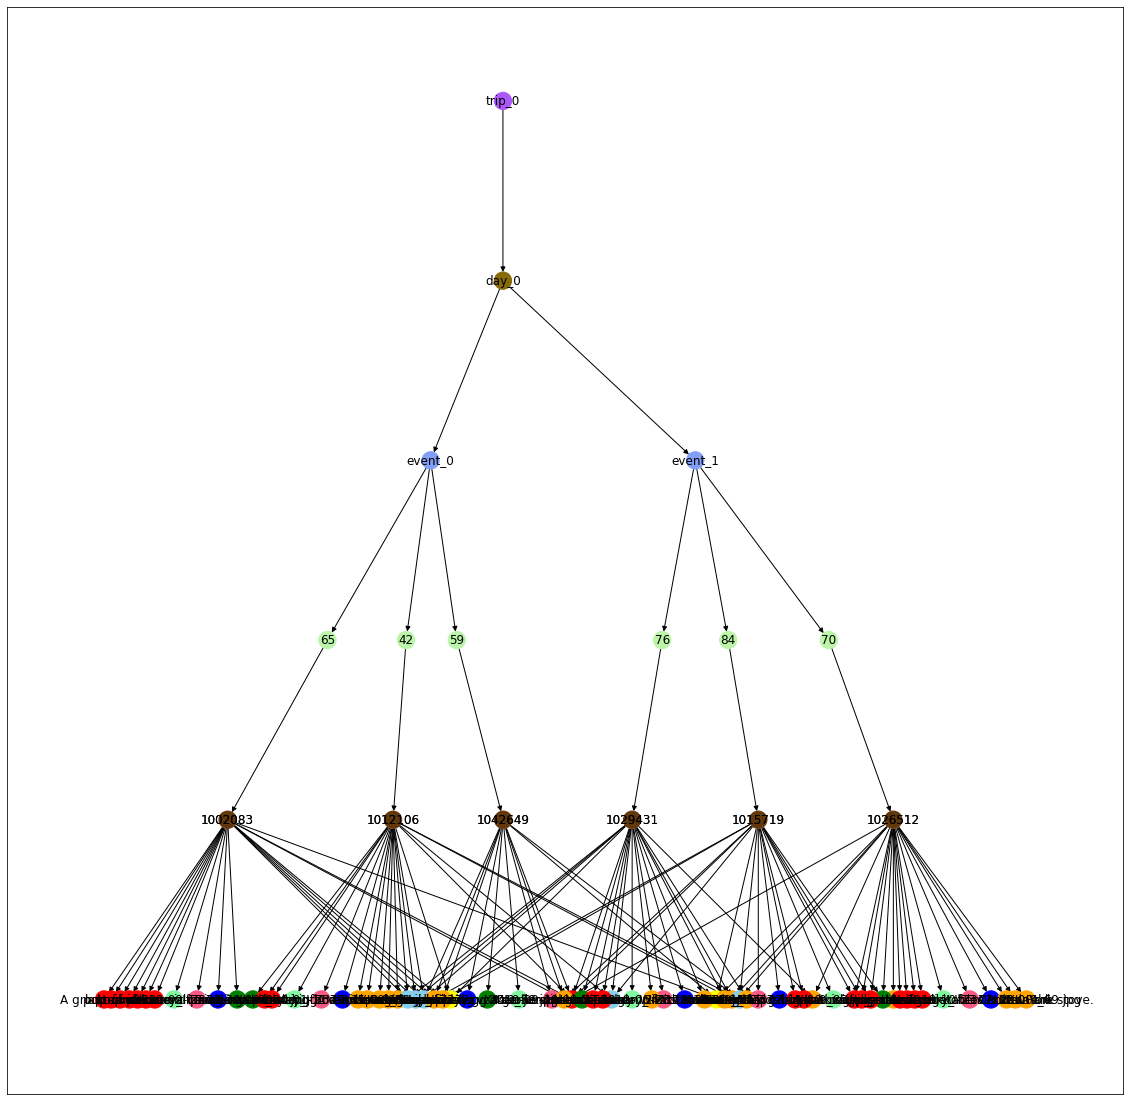

In [18]:
plt.figure(figsize=(20, 20))
memory_graph_sample = nx.read_gpickle("/data/data2/khahn/comet_memory_dialog_former/combined_memory_graph_1100_update/memory_graph_1/memory_graph_0.gpickle")
node_colors = [memory_graph_sample.nodes[node]['color'] if 'color' in memory_graph_sample.nodes[node] else '#61380B' for node in memory_graph_sample.nodes]
draw_hierarchy(memory_graph_sample, None, node_color=node_colors)
    

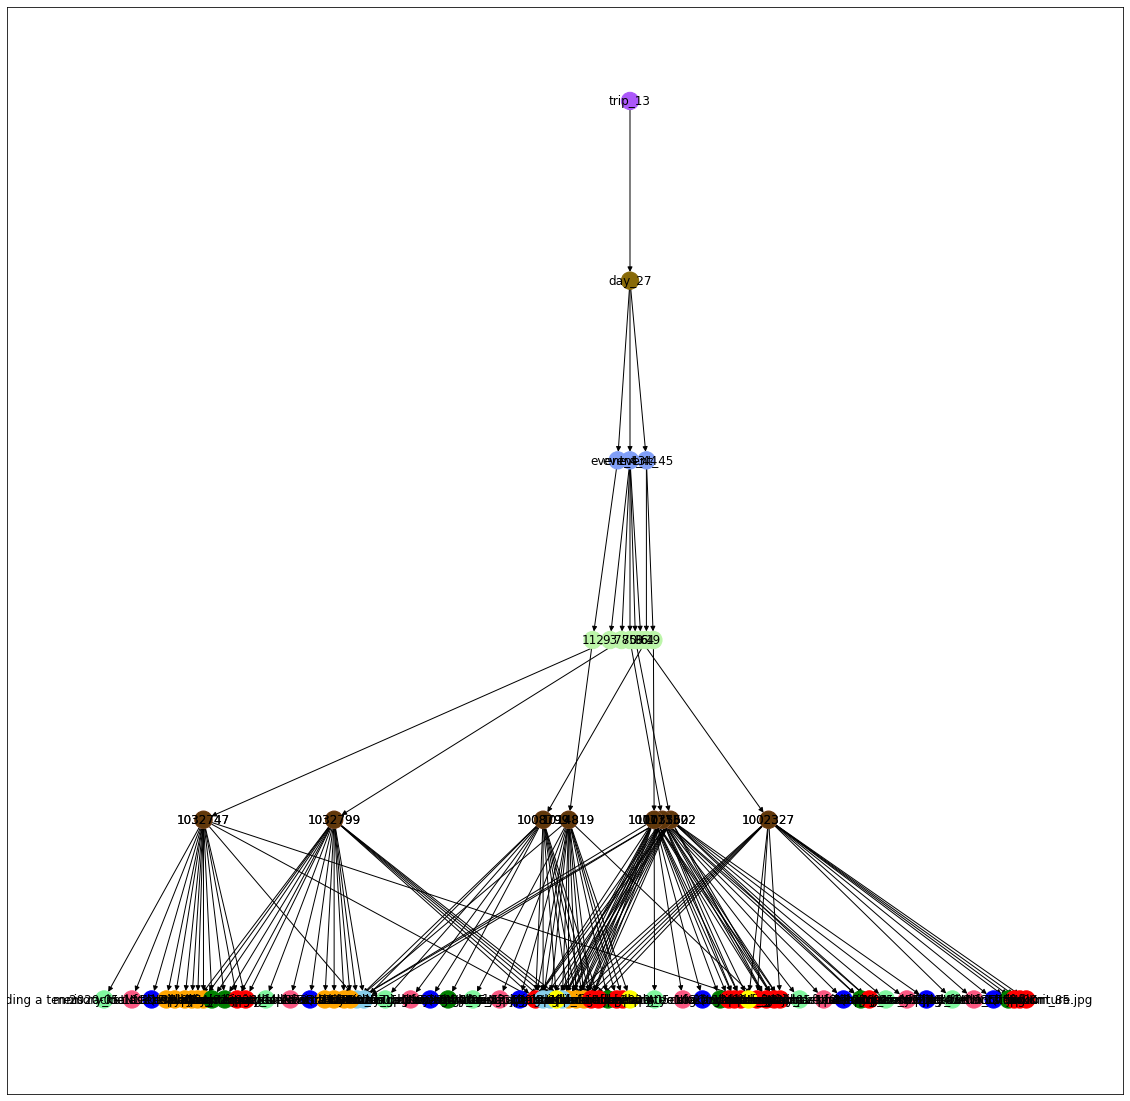

In [23]:
plt.figure(figsize=(20, 20))
memory_graph_sample = nx.read_gpickle("/data/data2/khahn/comet_memory_dialog_former/combined_memory_graph_1100_update/memory_graph_1100/memory_graph_13.gpickle")
node_colors = [memory_graph_sample.nodes[node]['color'] if 'color' in memory_graph_sample.nodes[node] else '#61380B' for node in memory_graph_sample.nodes]
draw_hierarchy(memory_graph_sample, None, node_color=node_colors)
    

In [19]:
def count_files_in_directory(directory):
    return sum(len(files) for _, _, files in os.walk(directory))

directory = '/data/data2/khahn/comet_memory_dialog_former/combined_memory_graph_1100_update'  
print("생성된 그래프 갯수 : ",count_files_in_directory(directory))


생성된 그래프 갯수 :  11601


In [20]:
import os
import networkx as nx

def avg_num_nodes_edges_in_graphs(directory):
    num_nodes = []
    num_edges = []

    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        
        for file_name in os.listdir(folder_path):

            if file_name.endswith('.gpickle'):
                file_path = os.path.join(folder_path, file_name)
                
                
                graph = nx.read_gpickle(file_path)
                num_nodes.append(graph.number_of_nodes())
                num_edges.append(graph.number_of_edges())

    
    avg_nodes = sum(num_nodes) / len(num_nodes) if num_nodes else 0
    avg_edges = sum(num_edges) / len(num_edges) if num_edges else 0
    
    return avg_nodes, avg_edges

avg_nodes, avg_edges = avg_num_nodes_edges_in_graphs(directory)
print(f"평균 memory graph의 노드 갯수: {avg_nodes}")
print(f"평균 memory graph의 엣지 갯수: {avg_edges}")


평균 memory graph의 노드 갯수: 113.31635203861737
평균 memory graph의 엣지 갯수: 172.25480562020516


In [7]:
memory_graph_sample.edges

OutEdgeView([('trip_5', 'day_14'), ('trip_5', 'day_15'), ('trip_5', 'day_16'), ('day_14', 'event_23'), ('day_14', 'event_24'), ('event_23', '23'), ('23', '1005551'), ('event_24', '72'), ('event_24', '85'), ('event_24', '96'), ('72', '1033933'), ('85', '1008962'), ('96', '1021938'), ('day_15', 'event_25'), ('day_15', 'event_26'), ('event_25', '16'), ('16', '1027395'), ('event_26', '53'), ('event_26', '62'), ('53', '1027562'), ('62', '1026837'), ('day_16', 'event_27'), ('day_16', 'event_28'), ('event_27', '9'), ('event_27', '10'), ('event_27', '19'), ('event_27', '24'), ('event_27', '25'), ('9', '1005906'), ('10', '1008656'), ('19', '1018923'), ('24', '1023142'), ('25', '1022145'), ('event_28', '75'), ('75', '1043053'), (1005551, 'narrations'), (1005551, 'time'), (1005551, 'media'), (1005551, 'location'), (1005551, 'participant'), (1005551, 'activity'), (1005551, 'objects'), (1005551, 'time_part'), ('narrations', 'A couple of horses on a city street.'), ('narrations', 'The bowl is filled

In [9]:
# 그래프 생성 함수
def create_memories_graph(memory, index):
    
    ## 둘 중 하나 선택(optional)
    # G = nx.DiGraph() # Direct Graph
    G = nx.Graph() # Undirect Graph

    # 상위-하위 level 그래프
    def add_node_and_edge(node, memories_node, color):
        G.add_node(node, color=color)
        G.add_edge(memories_node, node)
        
    # 상위-중위-하위 level 그래프
    def add_sub_node_and_edge(sub_node, mid_node, top_node, color):
        G.add_node(sub_node, color=color)
        G.add_edge(mid_node, sub_node)
        G.add_edge(top_node, mid_node)

    # 'memory_groups'의 'memories' 각 리스트 성분노드에 연결해줄 중간 level 노드
    def add_memories_node(memories_node, color):
        G.add_node(memories_node, color=color)
        # G.add_edge(f'memories_node_{index+1}', memories_node)
        G.add_edge(memory['memory_id'], memories_node)

    # "memories_node" 노드 추가
    # G.add_node(f'memories_node_{index+1}', color="pink") # 1부터 시작 (1~92)
    G.add_node(memory['memory_id'], color="pink") # 1부터 시작 (1~92)

    # 각 상위 노드를 "memories"에 연결하고, 그 상위 노드에 따른 하위 노드들을 추가
    # for memories_node in ['memory_id', 'time', 'media', 'location', 'participant', 'activity', 'objects', 'time_part']:
    for memories_node in ['narrations','time', 'media', 'location', 'participant', 'activity', 'objects', 'time_part']:
        if memories_node in memory and memory[memories_node]:  # 상위 노드에 해당하는 값이 있는 경우만 노드를 생성
            add_memories_node(memories_node, 'lightgray')
    
    ## 'narrations' 정보 노드 추가
    if 'narrations' in memory and memory['narrations']:
        # print(memory['narrations'])
        add_node_and_edge(memory['narrations'], 'narrations', '#81F79F')
            
    ## 'time' 정보 노드 추가
    if 'time' in memory and memory['time']:
        # print(memory['time'])
        add_node_and_edge(memory['time'], 'time', '#FA5882')

    # ## 'memory_id' 정보 노드 추가
    # if 'memory_id' in memory and memory['memory_id']:
    #     add_node_and_edge(memory['memory_id'], 'memory_id', '#81F7BE')
    
    ## 'media' 정보 노드 추가
    if 'media' in memory and memory['media']:
        #'media' 하위 정보들의 value값을 노드명으로 지정
        media_values = [str(value) for key, value in memory['media'][0].items() if value] 
        # print(media_values[0])
        # add_node_and_edge(media_values[0], 'media', 'blue')
        add_node_and_edge(media_values[3], 'media', 'blue')
        # add_node_and_edge(media_values[0], 'media', 'blue')
        # for value in media_values:
        #     add_node_and_edge(value, 'media', 'blue')
        
    ## 'location' 정보 노드 추가
    if 'location' in memory:
        # # GPS 정보 
        # if 'gps' in memory['location'] and memory['location']['gps']:
        #     G.add_node('gps', color='orange') 
        #     gps_values = [str(value) for key, value in memory['location']['gps'].items() if value]
        #     for value in gps_values:
        #         add_sub_node_and_edge(value, 'gps', 'location', 'orange')

        # Geo tag 정보 
        if 'geo_tag' in memory['location'] and memory['location']['geo_tag']:
            G.add_node('geo_tag', color='orange')  
            geo_tag_values = [str(value) for key, value in memory['location']['geo_tag'].items() if value]
            for value in geo_tag_values:
                add_sub_node_and_edge(value, 'geo_tag', 'location', 'orange')

        # # Category 정보 
        # if 'category' in memory['location'] and memory['location']['category']:
        #     G.add_node('category', color='orange') 
        #     for category in memory['location']['category']:
        #         add_sub_node_and_edge(category, 'category', 'location', 'orange')

        # # Set 정보 
        # if 'set' in memory['location'] and memory['location']['set']:
        #     G.add_node('set', color='orange') 
        #     add_sub_node_and_edge(memory['location']['set'], 'set', 'location', 'orange')


    ## 'activity' 정보 노드 추가
    if 'activity' in memory and memory['activity']:
        activity_values = [activity['activity_name'] for activity in memory['activity']]
        for value in activity_values:
            add_node_and_edge(value, 'activity', 'green')


    ## 'objects' 정보 노드 추가
    if 'objects' in memory and memory['objects']:
        for value in memory['objects']:
            add_node_and_edge(value, 'objects', 'red')


    ## 'participant' 정보 노드 추가
    if 'participant' in memory:
        for participant in memory['participant']:
            if 'name' in participant and participant['name'] and 'memory_graph_id' in participant:
                add_node_and_edge(participant['name'], 'participant', 'skyblue')
    
    ## 'time_part' 정보 노드 추가
    if 'time_part' in memory:
        add_node_and_edge(memory['time_part'], 'time_part', 'yellow')
    
            
    return G

